In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [30]:
annualobsdata = pd.read_csv("C:/Users/rob635/Downloads/ts_415201.csv")
annualPETdata = pd.read_csv("C:/Users/rob635/Downloads/et_morton_wet_415201.csv")
inundationevents = pd.read_csv("C:/Users/rob635/OneDrive - CSIRO/415201WO_landsat_events.csv")
annualinundation = pd.read_csv("C:/Users/rob635/OneDrive - CSIRO/415201WO_landsat_years.csv")

In [31]:
annualobsdata['PET(mm)'] = annualPETdata['Extracted_data']

In [32]:
annualobsdata = annualobsdata.drop(0, axis = 0)
annualPETdata = annualPETdata.drop(0, axis = 0)
annualobsmoving = annualobsdata.rolling(5, center = True).mean()
annualPETdatamoving = annualPETdata.rolling(5, center = True).mean()

In [33]:
periods = annualobsdata['year'].copy(deep=True)
periods[:]=2
periods[annualobsdata['year']<1997] = 1
periods[annualobsdata['year']>=2010] = 3
annualobsdata['periods'] = periods

periodsdata = annualobsdata.groupby('periods').mean()
periodsdata['width'] = annualobsdata.groupby('periods').count()['year']

periodsdata.columns = ["period_"+col for col in periodsdata.columns]
periodsdata

for col in periodsdata.columns:
    annualobsdata[col] = np.nan
    for per in annualobsdata['periods'].unique():
        print(col, per)
        annualobsdata[col].iloc[np.where(annualobsdata['periods']==per)] = periodsdata[col].iloc[np.where(periodsdata.index==per)[0][0]]
annualobsdata

period_year 1
period_year 2
period_year 3
period_E(mm) 1
period_E(mm) 2
period_E(mm) 3
period_Flow(mm) 1
period_Flow(mm) 2
period_Flow(mm) 3
period_Rain(mm) 1
period_Rain(mm) 2
period_Rain(mm) 3
period_LAI(m2perm2) 1
period_LAI(m2perm2) 2
period_LAI(m2perm2) 3
period_PET(mm) 1
period_PET(mm) 2
period_PET(mm) 3
period_width 1
period_width 2
period_width 3


C:\Users\rob635\AppData\Local\Temp\ipykernel_12240\189312902.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  annualobsdata[col].iloc[np.where(annualobsdata['periods']==per)] = periodsdata[col].iloc[np.where(periodsdata.index==per)[0][0]

,year,E(mm),Flow(mm),Rain(mm),LAI(m2perm2),PET(mm),periods,period_year,period_E(mm),period_Flow(mm),period_Rain(mm),period_LAI(m2perm2),period_PET(mm),period_width
1,1983,451.082783,116.102093,730.845179,1.561188,1096.866225,1,1989.5,515.537117,64.272725,618.127038,1.607760,1126.193286,14.0
2,1984,546.593741,57.873370,606.988640,1.529510,1125.773250,1,1989.5,515.537117,64.272725,618.127038,1.607760,1126.193286,14.0
3,1985,452.051231,16.344107,543.815522,1.590617,1125.329876,1,1989.5,515.537117,64.272725,618.127038,1.607760,1126.193286,14.0
4,1986,517.629553,47.316897,631.879244,1.743905,1089.112287,1,1989.5,515.537117,64.272725,618.127038,1.607760,1126.193286,14.0
5,1987,587.257030,36.545296,613.072977,1.648573,1136.690884,1,1989.5,515.537117,64.272725,618.127038,1.607760,1126.193286,14.0
6,1988,539.227206,112.437533,679.581582,1.566024,1177.002544,1,1989.5,515.537117,64.272725,618.127038,1.607760,1126.193286,14.0
7,1989,543.571170,75.056956,642.771081,1.747908,1142.824344,1,1989.5,515.537117,64.272725,618.127038,1.607760,1126.193286,14.0
8,1990,480.232365,37.363743,486.334464,1.510435,1172.887375,1,1989.5,515.537117,64.272725,618.127038,1.607760,1126.193286,14.0
9,1991,474.438186,52.605452,590.751725,1.604813,1157.526160,1,1989.5,515.537117,64.272725,618.127038,1.607760,1126.193286,14.0
10,1992,526.771737,126.873038,848.097114,1.723671,1041.578196,1,1989.5,515.537117,64.272725,618.127038,1.607760,1126.193286,14.0


Text(0.5, 0, 'Year')

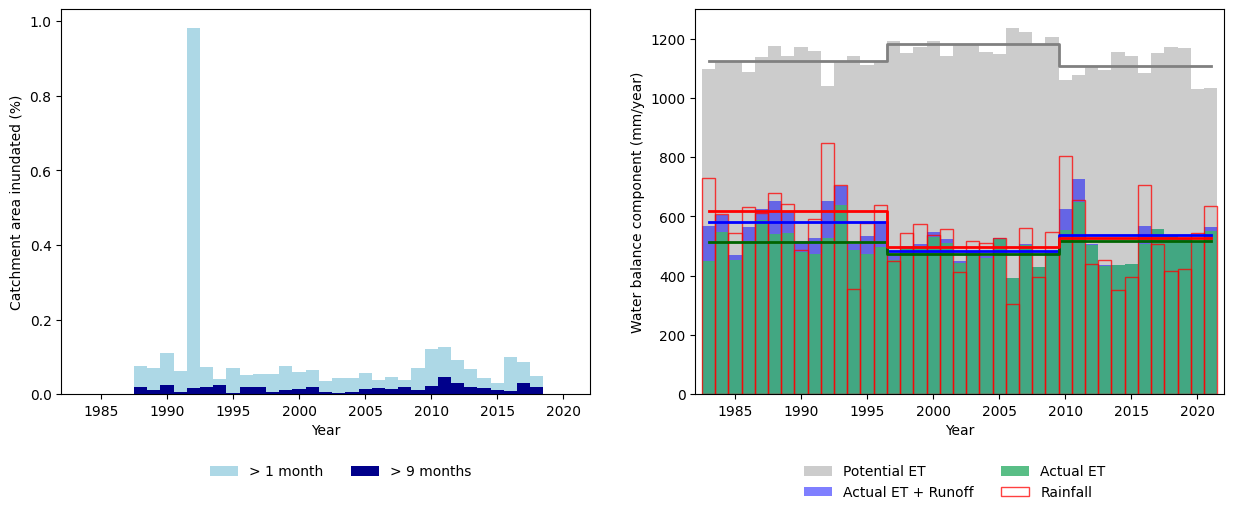

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={"width_ratios": [1, 1]})

ax[0].bar(x = annualinundation['year'], height = annualinundation['At least one month']/1976*100, label = "> 1 month", width = 1.0, color = 'lightblue')
ax[0].bar(x = annualinundation['year'], height = annualinundation['More than 9 months']/1976*100, label = "> 9 months", width = 1.0, color = 'darkblue')
#ax[0].legend(frameon=False)
ax[0].set_ylabel("Catchment area inundated (%)")
# ax[0].plot(annualobsdata['year'], annualobsdata['LAI(m2perm2)'])
# ax[0].set_ylim([0.,2.])

ax[1].bar(x=annualobsdata['year'],height= annualobsdata['PET(mm)'], width = 1.0, label = "Potential ET", color = 'gray', alpha = 0.4)
ax[1].step(annualobsdata['year'], annualobsdata['period_PET(mm)'], color = "gray", where = 'mid', linewidth =2.0)
#ax[1].plot(annualPETdatamoving['year']-2, annualPETdatamoving['Extracted_data'], color = "gray")
#ax[1].plot(annualPETdatamoving['year']-2, annualPETdatamoving['Extracted_data'], color = "gray")
ax[1].bar(x=annualobsdata['year'],height= annualobsdata['E(mm)']+annualobsdata['Flow(mm)'], width = 1.0, label = "Actual ET + Runoff", color = 'blue', alpha =0.5)
ax[1].step(annualobsdata['year'], annualobsdata['period_E(mm)']+annualobsdata['period_Flow(mm)'],color = "blue", where = 'mid', linewidth = 2.0)
#ax[1].plot(annualobsmoving['year']-2, annualobsmoving['Flow(mm)'], color = "blue")
ax[1].bar(x=annualobsdata['year'], height= annualobsdata['E(mm)'],width = 1.0,  label = "Actual ET", color = 'mediumseagreen', alpha = 0.85)
ax[1].step(annualobsdata['year'], annualobsdata['period_E(mm)'], color = "darkgreen", where = 'mid', linewidth = 2.0)

#ax[1].plot(annualobsmoving['year']-2, annualobsmoving['E(mm)']+annualobsmoving['Flow(mm)'], color = "green")


ax[1].bar(annualobsdata['year'], annualobsdata['Rain(mm)'], label = "Rainfall", width = 1.0, fill = False , edgecolor = "red", alpha =0.75)
#ax[1].plot(annualobsmoving['year']-2, annualobsmoving['Rain(mm)'], color = "red")
ax[1].step(annualobsdata['year'], annualobsdata['period_Rain(mm)'], color = "red", where = 'mid', linewidth = 2.0)
#ax[1].set_yscale("log")
#ax[1].set_ylim([0.,900.])
ax[1].legend(frameon=False,bbox_to_anchor=(0.8, -0.15), ncol = 2 )
ax[1].set_ylabel("Water balance component (mm/year)")
ax[1].set_xlabel("Year")

ax[1].set_xlim([1982, 2022])
ax[0].set_xlim([1982, 2022])
ax[0].legend(frameon=False,bbox_to_anchor=(0.8, -0.15), ncol = 2 )
ax[0].set_xlabel("Year")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={"width_ratios": [1, 1]})
ax[0].plot(annualobsdata['year'], annualobsdata['LAI(m2perm2)'])
ax[0].set_ylim([0.,2.])

ax[1].bar(x=annualobsdata['year'],height= (annualobsdata['E(mm)'])/annualobsdata['Rain(mm)'], width = 1.0, label = "Runoff + ETa", color = 'green')
ax[1].bar(x=annualobsdata['year'], height= (annualobsdata['Flow(mm)'])/annualobsdata['Rain(mm)'],width = 1.0,  label = "Runoff", color = 'blue')
#ax[1].bar(annualobsdata['year'], annualobsdata['Rain(mm)'], label = "Rainfall", width = 1.0, fill = False , edgecolor = "red", hatch = "\\")
#ax[1].set_yscale("log")
#ax[1].set_ylim([0.,900.])
ax[1].legend()

In [ ]:
fitindex = np.isfinite(annualobsdata['LAI(m2perm2)'])
coeffs1 = np.polyfit(annualobsdata['year'][fitindex],  annualobsdata['LAI(m2perm2)'][fitindex],1)
print(coeffs1)
polyfit1_fn = np.poly1d(coeffs1)

coeffs2 = np.polyfit(annualobsdata['year'][fitindex],  (annualobsdata['E(mm)'][fitindex]/annualPETdata['Extracted_data'][fitindex]),1)
print(coeffs2)
polyfit2_fn = np.poly1d(coeffs2)

plt.plot(annualobsdata['year'], annualobsdata['E(mm)']/annualPETdata['Extracted_data'])
plt.plot(annualobsdata['year'], annualobsdata['LAI(m2perm2)']/4)
plt.plot(annualobsdata['year'], polyfit1_fn(annualobsdata['year'])/4)
plt.plot(annualobsdata['year'], polyfit2_fn(annualobsdata['year']))

In [ ]:
plt.scatter(annualobsdata['LAI(m2perm2)'], (annualobsdata['E(mm)']/annualPETdata['Extracted_data']))


In [ ]:
periods = annualobsdata['year'].copy(deep=True)
periods[:]=2
periods[annualobsdata['year']<1997] = 1
periods[annualobsdata['year']>=2010] = 3
annualobsdata['periods'] = periods

periodsdata = annualobsdata.groupby('periods').mean()
periodsdata['width'] = annualobsdata.groupby('periods').count()['year']


In [ ]:
coeffs1 = np.polyfit(annualobsdata['year'][fitindex],  (annualobsdata['Rain(mm)']- (annualobsdata['E(mm)']+annualobsdata['Flow(mm)']))[fitindex],3)
print(coeffs1)
polyfit1_fn = np.poly1d(coeffs1)
plt.bar(periodsdata['year'], (periodsdata['Rain(mm)']- (periodsdata['E(mm)']+periodsdata['Flow(mm)'])), width=periodsdata['width'], color = "blue", alpha = 0.5)
plt.bar(annualobsdata['year'], (annualobsdata['Rain(mm)']- (annualobsdata['E(mm)']+annualobsdata['Flow(mm)'])), color = "blue")
rollingannual = annualobsdata.rolling(5).mean()
#plt.plot(rollingannual['year'], (rollingannual['Rain(mm)']- (rollingannual['E(mm)']+rollingannual['Flow(mm)'])),c='red')
#plt.plot(annualobsdata['year'], polyfit1_fn(annualobsdata['year']),c="black")


#plt.plot([annualobsdata['year'].min(),annualobsdata['year'].max()],[0,0], c="black")
plt.grid()
